<a href="https://www.kaggle.com/code/jetty2307/titanic-highlights?scriptVersionId=104100588" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
conditions = [(df['Survived'] == 0), (df['Survived'] == 1)]
values = ["Died","Survived"]
df['Survived_txt'] = np.select(conditions,values)

In [7]:
conditions_emb = [(df['Embarked'] == 'S'), (df['Embarked'] == 'C'), (df['Embarked'] == 'Q')]
values_emb = [1,2,3]
values = ["Southampton", "Chambery", "Queenstown"]
df['Embarked_code'] = np.select(conditions_emb,values_emb)
df['Embarked'] = np.select(conditions_emb,values)

In [8]:
dfg = df.groupby(['Sex'])['PassengerId'].count()
dfg1 = df[df['Survived'] == 1].groupby(['Sex'])['PassengerId'].count()
dfg2 = df.groupby(['Survived_txt','Sex'])['PassengerId'].count().unstack('Sex')

<AxesSubplot:title={'center':'Survival rate'}, xlabel='Status', ylabel='Number'>

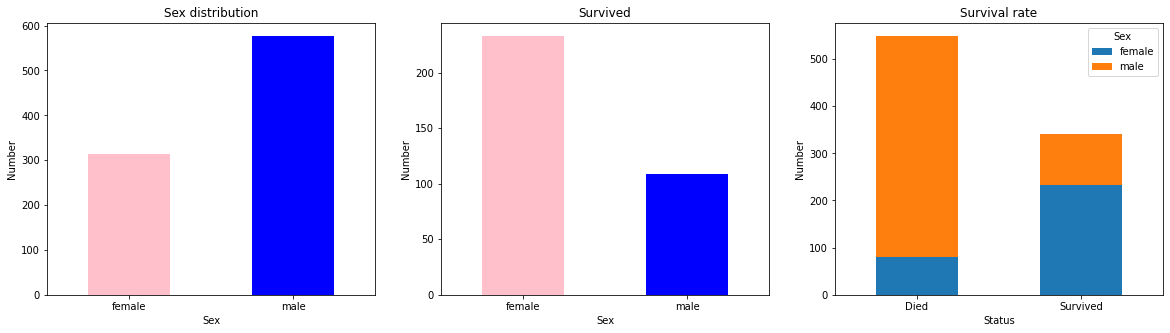

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

dfg.plot(kind='bar', title='Sex distribution', ylabel='Number',
         xlabel='Sex', figsize = (20,5), color = ['pink', 'blue'], ax=ax1, rot=0)
dfg1.plot(kind='bar', title='Survived', ylabel='Number',
         xlabel='Sex', figsize = (20,5), color = ['pink', 'blue'], ax=ax2, rot=0)
dfg2.plot(kind='bar', stacked=True, figsize = (20,5), title='Survival rate', ylabel='Number',
         xlabel='Status', ax=ax3, rot=0)


In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
df['Deck'] = 'A'
df['Room'] = '1'
ko = df['Cabin'].isna()
i = 0

for el in df.Cabin:   
    if ko[i] == False:
        df['Deck'][i] = el[0] 
        try:
            df['Room'][i] = int(el[1:])
        except:
            pass
    else:
        df['Deck'][i] = 'No' 
        df['Room'][i] = 0
    i += 1

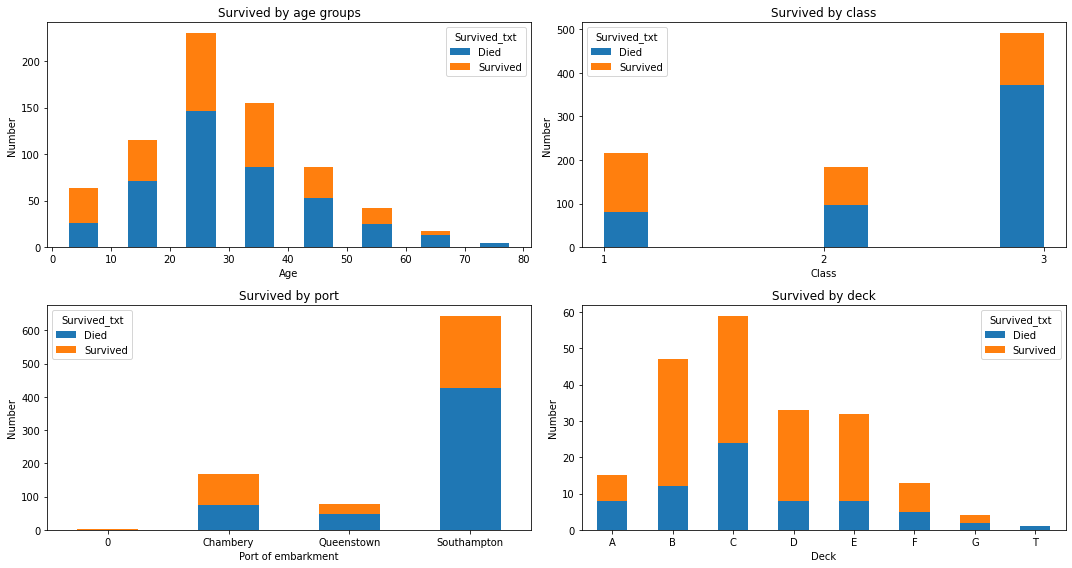

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
df.pivot(columns='Survived_txt')['Age'].plot(kind = 'hist',figsize=(15,8), title='Survived by age groups',
         rwidth=0.5, bins=8, ax=ax1, stacked=True)
ax1.set_xlabel("Age")
ax1.set_ylabel("Number")

df.pivot(columns='Survived_txt')['Pclass'].plot(kind = 'hist',figsize=(15,8), title='Survived by class', 
         ax=ax2, stacked=True, xticks=[1,2,3])
ax2.set_xlabel("Class")
ax2.set_ylabel("Number")

dfg3 = df.groupby(['Survived_txt','Embarked'])['PassengerId'].count().unstack('Survived_txt')
dfg3.plot(kind='bar', stacked=True, figsize = (15,8), title='Survived by port', ylabel='Number',
         xlabel='Port of embarkment', ax=ax3, rot=0)

dfg4 = df[df['Deck'] != 'No'].groupby(['Survived_txt','Deck'])['PassengerId'].count().unstack('Survived_txt')
dfg4.plot(kind='bar', stacked=True, figsize = (15,8), title='Survived by deck', ylabel='Number',
         xlabel='Deck', ax=ax4, rot=0)

plt.tight_layout()

In [13]:
levels = set()
numbers = set()
for el in df.Cabin[df['Cabin'].notna()]:
    levels.add(el[0])
    numbers.add(el[1:])      
levels    
#numbers # 148 - max number of a cabin, 2 - min  

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [14]:
conditions = [(df['Deck'] == 'No'), (df['Deck'] == 'A'), (df['Deck'] == 'B'), (df['Deck'] == 'C'), (df['Deck'] == 'D'), (df['Deck'] == 'E'), (df['Deck'] == 'F'), (df['Deck'] == 'G'), (df['Deck'] == 'T')]
values= [0,1,2,3,4,5,6,7,20]
df['Deck_number'] = np.select(conditions,values)

In [15]:
df1 = df[['Cabin','Survived']].dropna()
df1.reset_index(inplace=True)
df1.head()

,index,Cabin,Survived
0,1,C85,1
1,3,C123,1
2,6,E46,0
3,10,G6,1
4,11,C103,1


In [16]:
df2 = df1.pivot(columns='Cabin')['Survived'].mean()

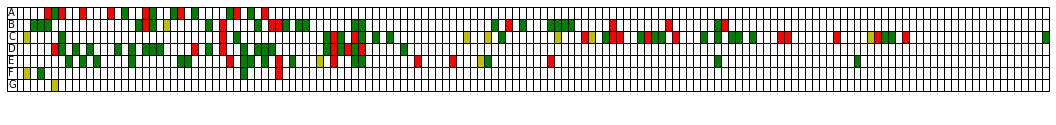

In [17]:
# green - all survived, yellow - partially survived, red - all dead

colors_row = [['w' for i in range(148)] for j in range(7)]

rows = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
k = 0

for i in range(df2.shape[0]):    
    if (df2.index[i][0] in rows) and (df2.index[i][1:].isdigit()):
        k += 1
        deck = rows.index(df2.index[i][0])
        number = int(df2.index[i][1:]) - 1
        
        if df2[i] == 0:
            colors_row[deck][number] = "r"                                      
        elif df2[i] == 1:
            colors_row[deck][number] = "g"                
        else:
            colors_row[deck][number] = "y"
    else:
        pass
    
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 0.5)
ax.axis('tight')
ax.axis('off')
the_table = ax.table(rowLabels=rows, cellColours=colors_row, loc='top') 
plt.show()

In [18]:
conditions = [(df['Sex'] == "female"), (df['Sex'] == "male")]
values = [0,1]
df['Sex_id'] = np.select(conditions,values)

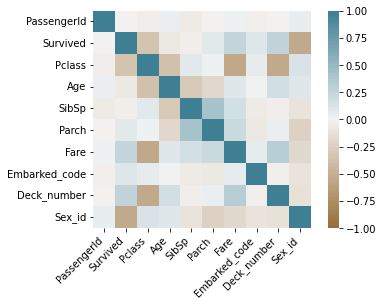

In [19]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
X_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [21]:
from sklearn.model_selection import train_test_split

df1 = df

In [22]:
df = df1
y = df.Survived
X = df[['Sex_id', 'Deck_number','Pclass','Embarked_code','Age','Parch','SibSp','Fare','Room']]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)  


In [23]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [24]:
from xgboost import XGBClassifier

my_model_1 = XGBClassifier(random_state=0) 
my_model_1.fit(X_train, y_train) #


[13:32:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
from sklearn.metrics import mean_absolute_error

predictions_1 = my_model_1.predict(X_valid) 

In [26]:
from sklearn.metrics import jaccard_score
jaccard_score(y_valid, predictions_1,pos_label=0)


0.7936507936507936

In [27]:
predictions_2 = my_model_1.predict(X_test)